# MNIST example

Simple, 2-minute working example for MiniML.jl

## Install the required packages

In [1]:
using Pkg
Pkg.add(url = "https://github.com/arqamrp/MiniML.jl")
using MiniML

    Updating git-repo `https://github.com/arqamrp/MiniML.jl`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [19]:
Pkg.add("MLDatasets")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [91a5bcdd] + Plots v1.40.9
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [d38c429a] + Contour v0.6.3
  [c87230d0] + FFMPEG v0.4.2
  [1fa38f19] + Format v1.3.7
  [28b8d3ca] + GR v0.73.8
  [42e2da0e] + Grisu v1.0.2
  [1019f520] + JLFzf v0.1.9
  [23fbe1c1] + Latexify v0.16.5
  [442fdcdd] + Measures v0.3.2
  [77ba4419] + NaNMath v1.0.2
  [b98c9c47] + Pipe v1.3.0
  [ccf2f8ad] + PlotThemes v3.3.0
  [995b91a9] + PlotUtils v1.4.3
  [91a5bcdd] + Plots v1.40.9
  [3cdcf5f2] + RecipesBase v1.3.4
  [01d81517] + RecipesPipeline v0.6.12
  [05181044] + RelocatableFolders v1.0.1
  [992d4aef] + Showoff v1.0.3
  [860ef19b] + StableRNGs v1.0.2
  [1cfade01] + UnicodeFun v0.4.1
  [45397f5d] + UnitfulLatexify v1.6.4
  [41fe7b60] + Unzip v0.2.0
  [6e34b625] 

## Download MNIST

In [3]:
using MLDatasets

train_x, train_y = MNIST.traindata()
test_x, test_y = MNIST.testdata()

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/0MkOE/src/datasets/vision/mnist.jl:187
┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/0MkOE/src/datasets/vision/mnist.jl:195


(features = FixedPointNumbers.N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; … ;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

## Preprocess the data

Flatten the 3D tensor into 2D and split into shuffled batches

In [4]:
X_test = Float64.(test_x)
X_test = reshape(X_test, (784, 10000))
y_test = Int64.(test_y)

y_train = Int64.(train_y)
X_train= reshape(train_x, (784, 60000))
X_train = Float64.(X_train)

784×60000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [5]:
batch_size = 500

X_batches, y_batches = MiniML.make_batches(X_train, y_train, batch_size)

# Check size of first batch
println(size(X_batches[1]))  
println(size(y_batches[1]))  

(784, 500)
(10, 500)


## Initialise the neural network

In [6]:
layer_dims = (784, 128, 10)
model = NeuralNet(layer_dims; activation_fn = MiniML.relu, postprocess_fn = MiniML.softmax)

NeuralNet((784, 128, 10), Dict{Integer, Tuple{Vararg{Tensor}}}(2 => (Tensor{Float64}((10, 128), Float64, [2.522172514526373 -1.2490756922110948 … 0.5316295339201356 0.1724806202219627; -0.8987588225094336 -0.09151155246158568 … 1.664607864704522 -0.10666877412936226; … ; 0.2280644820354243 -0.9878401124554524 … 0.27373164803637284 0.11350583546880284; 1.0419474588733233 -0.015234615806731211 … 0.3311099362899764 1.015401911521106], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], true, true, (), "", nothing), Tensor{Float64}((10, 1), Float64, [-0.22422378406058216; 1.6703485559881408; … ; 2.2169966208809897; 1.0455188917563965;;], [0.0; 0.0; … ; 0.0; 0.0;;], true, true, (), "", nothing)), 1 => (Tensor{Float64}((128, 784), Float64, [-0.08001464150412627 -0.34479220979743186 … -0.05242981903513844 0.6308101798691935; -0.8763178487763076 0.21551217987602067 … -0.8949696692373208 -0.8253922615583222; … ; -1.7755235921659411 -0.4478164880196054 … 1.132132638

## Training

In [9]:
losses = MiniML.batch_train!(model = model, loss_fn = MiniML.categorical_cross_entropy, X_batches= X_batches, y_batches = y_batches, num_epochs = 50, lr = 1e-1)

Epoch 1
7.471549367427351
Epoch 2
3.770550592792499
Epoch 3
3.333397216686449
Epoch 4
3.1078686884916187
Epoch 5
2.9692531815717427
Epoch 6
2.8722521658843236
Epoch 7
2.7959242583266595
Epoch 8
2.7165027538049795
Epoch 9
0.6405885044968403
Epoch 10
0.4187518916600832
Epoch 11
0.34332680650000114
Epoch 12
0.29358764742472515
Epoch 13
0.25704556439439946
Epoch 14
0.2302342466894927
Epoch 15
0.2098334928941305
Epoch 16
0.19404485880060204
Epoch 17
0.17818049651379136
Epoch 18
0.16516414514311156
Epoch 19
0.1541119138487336
Epoch 20
0.14445630102394616
Epoch 21
0.13686217934951164
Epoch 22
0.13105610866255374
Epoch 23
0.12535866238313526
Epoch 24
0.12011774478103684
Epoch 25
0.11576375335054333
Epoch 26
0.11183127036013545
Epoch 27
0.10844727812661833
Epoch 28
0.10542709220199213
Epoch 29
0.10300353934812957
Epoch 30
0.10061471226916055
Epoch 31
0.0985937157077443
Epoch 32
0.09686220645452169
Epoch 33
0.094833283151513
Epoch 34
0.09312736844225529
Epoch 35
0.09134917224389691
Epoch 36
0.08

50-element Vector{Float64}:
 7.471549367427351
 3.770550592792499
 3.333397216686449
 3.1078686884916187
 2.9692531815717427
 2.8722521658843236
 2.7959242583266595
 2.7165027538049795
 0.6405885044968403
 0.4187518916600832
 0.34332680650000114
 0.29358764742472515
 0.25704556439439946
 ⋮
 0.08609547363639761
 0.08506902615090027
 0.08405250563312675
 0.08310165742304182
 0.08223939274975536
 0.08139282228241605
 0.08061096581870233
 0.07980934083234312
 0.07913067292708606
 0.07858439596101308
 0.07812615766353101
 0.07770606516459334

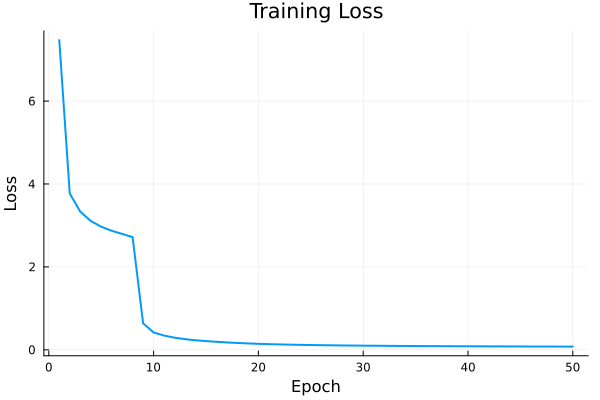

In [20]:
using Plots
plot(losses, xlabel="Epoch", ylabel="Loss", title="Training Loss", legend=false, lw=2)

## Evaluation

In [12]:
MiniML.classification_accuracy(model, tensor(X_test),  tensor(y_test)

0.9565